## Final Project Submission

Please fill out:
* Student name: Magali Solimano
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


In [141]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns  


In [2]:
## Load the data (11 files)
df1 = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip')
df2 = pd.read_csv('zippedData/imdb.name.basics.csv.gz', compression='gzip')
df3 = pd.read_csv('zippedData/imdb.title.akas.csv.gz', compression='gzip')
df4 = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip') 
df5 = pd.read_csv('zippedData/imdb.title.crew.csv.gz', compression='gzip')
df6 = pd.read_csv('zippedData/imdb.title.principals.csv.gz', compression='gzip')
df7 = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip')
df8 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t', compression='gzip')
df9 = pd.read_csv('zippedData/rt.reviews.tsv.gz', compression='gzip', delimiter='\t', encoding='iso-8859-1')
df10 = pd.read_csv('zippedData/tmdb.movies.csv.gz', compression='gzip')
df11 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')

In [4]:
# Explore the dataframes and data types
print(df1.info())
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
print(df2.info())
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB
None


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [6]:
print(df3.info())
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB
None


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [7]:
print(df4.info())
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
print(df5.info())
df5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB
None


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [9]:
print(df6.info())
df6.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB
None


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [10]:
print(df7.info())
df7.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
print(df8.info())
df8.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [12]:
print(df9.info())
df9.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
None


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [13]:
print(df10.info())
df10.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [14]:
print(df11.info())
df11.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [ ]:
## QUESTION 1: What movies are the top revenue, ROI generators?

In [ ]:
#df1 and #df11 have revenue cols -- compare these results. Can the dfs be joined?

In [15]:
# Convert budget and revenue cols to float dtype; release_date to datetime. Remove '$' and ','.
df11['production_budget'] = df11['production_budget'].map(lambda x: float(x.replace("$", "").replace(',','')))
df11['domestic_gross'] = df11['domestic_gross'].map(lambda x: float(x.replace("$", "").replace(',','')))
df11['worldwide_gross'] = df11['worldwide_gross'].map(lambda x: float(x.replace("$", "").replace(',','')))
df11['release_date'] = pd.to_datetime(df11['release_date'])
df11['year'] = pd.DatetimeIndex(df11['release_date']).year

# Confirm that dtype conversions worked and that null values did not increase
display(df11.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   year               5782 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 316.3+ KB


None

In [16]:
df11 = df11.rename(columns={"movie": "title"})
df11.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017


In [17]:
# Compare top gross: df1 vs df11

In [18]:
display(df1.sort_values(by=['domestic_gross'], ascending=False).head(20))
df11.sort_values(by=['domestic_gross'], ascending=False).head(20)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3082,Incredibles 2,BV,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017
2324,Finding Dory,BV,486300000.0,542300000,2016


,id,release_date,title,production_budget,domestic_gross,worldwide_gross,year
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009
41,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,2018
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,1997
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,2015
26,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,2012
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017
43,44,2018-06-15,Incredibles 2,200000000.0,608581744.0,1.242521e+09,2018
74,75,2008-07-18,The Dark Knight,185000000.0,533720947.0,1.001996e+09,2008


In [19]:
# There is overlap between df1 & df11. But, df11 has more movie entries (incl. several top revenue generators) that are not in df1.
# df1 might not have a particular studio's movies.

In [20]:
# Set index to title.
# Join df11 and df1--left join to bring in df1's studio info. 

In [21]:
df1.set_index('title', inplace = True)
df1.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [22]:
df11.set_index('title', inplace = True)
df11.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,year
title,,,,,,
Avatar,1,2009-12-18,425000000.0,760507625.0,2.776345e+09,2009
Pirates of the Caribbean: On Stranger Tides,2,2011-05-20,410600000.0,241063875.0,1.045664e+09,2011
Dark Phoenix,3,2019-06-07,350000000.0,42762350.0,1.497624e+08,2019
Avengers: Age of Ultron,4,2015-05-01,330600000.0,459005868.0,1.403014e+09,2015
Star Wars Ep. VIII: The Last Jedi,5,2017-12-15,317000000.0,620181382.0,1.316722e+09,2017


In [23]:
df_financials = df11.join(df1, how='left', rsuffix='_right')
display(df_financials.info())
df_financials.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, #Horror to é·æ±ä¸è (CJ7)
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    5782 non-null   int64         
 1   release_date          5782 non-null   datetime64[ns]
 2   production_budget     5782 non-null   float64       
 3   domestic_gross        5782 non-null   float64       
 4   worldwide_gross       5782 non-null   float64       
 5   year                  5782 non-null   int64         
 6   studio                1246 non-null   object        
 7   domestic_gross_right  1245 non-null   float64       
 8   foreign_gross         1086 non-null   object        
 9   year_right            1247 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 496.9+ KB


None

,id,release_date,production_budget,domestic_gross,worldwide_gross,year,studio,domestic_gross_right,foreign_gross,year_right
title,,,,,,,,,,
#Horror,16,2015-11-20,1500000.0,0.0,0.0,2015,NaN,NaN,NaN,NaN
(500) Days of Summer,55,2009-07-17,7500000.0,32425665.0,34439060.0,2009,NaN,NaN,NaN,NaN
10 Cloverfield Lane,54,2016-03-11,5000000.0,72082999.0,108286422.0,2016,Par.,72100000.0,38100000,2016.0
10 Days in a Madhouse,48,2015-11-11,12000000.0,14616.0,14616.0,2015,NaN,NaN,NaN,NaN
10 Things I Hate About You,63,1999-03-31,13000000.0,38177966.0,60413950.0,1999,NaN,NaN,NaN,NaN


In [24]:
# Drop df1 revenue data since they seem to round, while df11's revenue data is more precise.
# Drop foreign_gross, year_right.

In [25]:
df_financials = df_financials.drop(columns=['domestic_gross_right', 'foreign_gross', 'year_right'])

In [26]:
# Convert "0" values to NaN
df_financials['production_budget'] = df_financials['production_budget'].replace(0.0, np.nan)
df_financials['domestic_gross'] = df_financials['domestic_gross'].replace(0.0, np.nan)
df_financials['worldwide_gross'] = df_financials['worldwide_gross'].replace(0.0, np.nan)
df_financials.head(10)

,id,release_date,production_budget,domestic_gross,worldwide_gross,year,studio
title,,,,,,,
#Horror,16,2015-11-20,1500000.0,NaN,NaN,2015,NaN
(500) Days of Summer,55,2009-07-17,7500000.0,32425665.0,34439060.0,2009,NaN
10 Cloverfield Lane,54,2016-03-11,5000000.0,72082999.0,108286422.0,2016,Par.
10 Days in a Madhouse,48,2015-11-11,12000000.0,14616.0,14616.0,2015,NaN
10 Things I Hate About You,63,1999-03-31,13000000.0,38177966.0,60413950.0,1999,NaN
"10,000 B.C.",51,2008-03-07,105000000.0,94784201.0,269065678.0,2008,NaN
102 Dalmatians,6,2000-11-22,85000000.0,66941559.0,66941559.0,2000,NaN
10th & Wolf,32,2006-08-18,8000000.0,54702.0,143782.0,2006,NaN
11:14,90,2005-08-12,6000000.0,NaN,NaN,2005,NaN


In [27]:
# Create new cols for foreign_gross, net_revenue, ROI
df_financials['foreign_gross'] = df_financials['worldwide_gross'] - df_financials['domestic_gross']
df_financials['net_revenue'] = df_financials['worldwide_gross'] - df_financials['production_budget']
df_financials['ROI'] = ((df_financials['worldwide_gross'] - df_financials['production_budget']) / df_financials['production_budget']).round(2)
df_financials['ROIpct'] = (((df_financials['worldwide_gross'] - df_financials['production_budget']) / df_financials['production_budget'])*100).round(2)
df_financials.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross,net_revenue,ROI,ROIpct
title,,,,,,,,,,,
#Horror,16,2015-11-20,1500000.0,NaN,NaN,2015,NaN,NaN,NaN,NaN,NaN
(500) Days of Summer,55,2009-07-17,7500000.0,32425665.0,34439060.0,2009,NaN,2013395.0,26939060.0,3.59,359.19
10 Cloverfield Lane,54,2016-03-11,5000000.0,72082999.0,108286422.0,2016,Par.,36203423.0,103286422.0,20.66,2065.73
10 Days in a Madhouse,48,2015-11-11,12000000.0,14616.0,14616.0,2015,NaN,0.0,-11985384.0,-1.00,-99.88
10 Things I Hate About You,63,1999-03-31,13000000.0,38177966.0,60413950.0,1999,NaN,22235984.0,47413950.0,3.65,364.72


In [28]:
# reset index
df_financials.reset_index(inplace = True)

In [29]:
# Check for duplicates. Explore if need to remove or can keep.
df_financials['title'].value_counts()

Home                  3
King Kong             3
Halloween             3
The Avengers          2
Pet Sematary          2
                     ..
Spy!                  1
The Color Purple      1
Outside Providence    1
Emma                  1
Free Fire             1
Name: title, Length: 5698, dtype: int64

In [30]:
df_financials[df_financials['title'].duplicated() == True]

,title,id,release_date,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross,net_revenue,ROI,ROIpct
33,"20,000 Leagues Under the Sea",15,1916-12-24,200000.0,8000000.0,8000000.0,1916,NaN,0.0,7800000.0,39.00,3900.00
141,A Nightmare on Elm Street,17,1984-11-09,1800000.0,25504513.0,25504513.0,1984,NaN,0.0,23704513.0,13.17,1316.92
232,Aladdin,33,1992-11-11,28000000.0,217350219.0,504050219.0,1992,NaN,286700000.0,476050219.0,17.00,1700.18
246,Alice in Wonderland,60,1951-07-28,3000000.0,NaN,NaN,1951,NaN,NaN,NaN,NaN,NaN
406,Around the World in 80 Days,21,1956-10-17,6000000.0,42000000.0,42000000.0,1956,NaN,0.0,36000000.0,6.00,600.00
...,...,...,...,...,...,...,...,...,...,...,...,...
5351,Trance,31,2012-12-31,950000.0,NaN,NaN,2012,FoxS,NaN,NaN,NaN,NaN
5408,Twilight,20,1998-03-06,20000000.0,15055091.0,15055091.0,1998,NaN,0.0,-4944909.0,-0.25,-24.72
5463,Unforgettable,4,2017-04-21,12000000.0,11368012.0,16221211.0,2017,NaN,4853199.0,4221211.0,0.35,35.18
5472,Unknown,84,2006-11-03,3700000.0,26403.0,3355048.0,2006,WB,3328645.0,-344952.0,-0.09,-9.32


In [31]:
# view selection of rows with duplicate titles
df_financials.sort_values('title').iloc[231:250, :]

,title,id,release_date,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross,net_revenue,ROI,ROIpct
231,Aladdin,81,2019-05-24,182000000.0,246734314.0,6.192343e+08,2019,NaN,372500000.0,437234314.0,2.40,240.24
232,Aladdin,33,1992-11-11,28000000.0,217350219.0,5.040502e+08,1992,NaN,286700000.0,476050219.0,17.00,1700.18
233,Alatriste,81,2007-12-31,28000000.0,NaN,2.286048e+07,2007,NaN,NaN,-5139523.0,-0.18,-18.36
234,Albert Nobbs,67,2011-12-21,7500000.0,3014696.0,8.539003e+06,2011,RAtt.,5524307.0,1039003.0,0.14,13.85
235,Albino Alligator,65,1997-01-17,5000000.0,353480.0,3.534800e+05,1997,NaN,0.0,-4646520.0,-0.93,-92.93
236,Alex & Emma,70,2003-06-20,30000000.0,14208384.0,1.535858e+07,2003,NaN,1150199.0,-14641417.0,-0.49,-48.80
237,Alex Cross,100,2012-10-19,35000000.0,25888412.0,3.542676e+07,2012,LG/S,9538347.0,426759.0,0.01,1.22
238,Alex Rider: Operation Stormbreaker,34,2006-10-13,40000000.0,659210.0,2.072245e+07,2006,NaN,20063240.0,-19277550.0,-0.48,-48.19
239,Alexander,51,2004-11-24,155000000.0,34297191.0,1.672972e+08,2004,NaN,133000000.0,12297191.0,0.08,7.93
240,"Alexander and the Terrible, Horrible, No Good,...",44,2014-10-10,28000000.0,66954149.0,1.013793e+08,2014,BV,34425138.0,73379287.0,2.62,262.07


In [32]:
# Duplicate movie titles are due to movie being re-released years later. 
# Keep all rows and create new col 'title_yr'. 
df_financials['title_yr'] = df_financials['title'].str.cat(df_financials.year.astype(str), sep = '-')
df_financials.head()

,title,id,release_date,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross,net_revenue,ROI,ROIpct,title_yr
0,#Horror,16,2015-11-20,1500000.0,NaN,NaN,2015,NaN,NaN,NaN,NaN,NaN,#Horror-2015
1,(500) Days of Summer,55,2009-07-17,7500000.0,32425665.0,34439060.0,2009,NaN,2013395.0,26939060.0,3.59,359.19,(500) Days of Summer-2009
2,10 Cloverfield Lane,54,2016-03-11,5000000.0,72082999.0,108286422.0,2016,Par.,36203423.0,103286422.0,20.66,2065.73,10 Cloverfield Lane-2016
3,10 Days in a Madhouse,48,2015-11-11,12000000.0,14616.0,14616.0,2015,NaN,0.0,-11985384.0,-1.00,-99.88,10 Days in a Madhouse-2015
4,10 Things I Hate About You,63,1999-03-31,13000000.0,38177966.0,60413950.0,1999,NaN,22235984.0,47413950.0,3.65,364.72,10 Things I Hate About You-1999


In [33]:
df_financials[df_financials['title_yr'].duplicated() == True]

,title,id,release_date,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross,net_revenue,ROI,ROIpct,title_yr
2020,Home,60,2009-04-23,500000.0,15433.0,44793168.0,2009,NaN,44777735.0,44293168.0,88.59,8858.63,Home-2009


In [34]:
df_financials.sort_values('title').iloc[2017:2022, :]

,title,id,release_date,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross,net_revenue,ROI,ROIpct,title_yr
2017,Holy Motors,25,2012-10-17,4000000.0,641054.0,4230426.0,2012,IM,3589372.0,230426.0,0.06,5.76,Holy Motors-2012
2020,Home,60,2009-04-23,500000.0,15433.0,44793168.0,2009,NaN,44777735.0,44293168.0,88.59,8858.63,Home-2009
2019,Home,56,2009-06-05,12000000.0,NaN,NaN,2009,NaN,NaN,NaN,NaN,NaN,Home-2009
2018,Home,44,2015-03-27,130000000.0,177397510.0,385997896.0,2015,NaN,208600386.0,255997896.0,1.97,196.92,Home-2015
2021,Home Again,57,2017-09-08,15000000.0,27020284.0,37336874.0,2017,ORF,10316590.0,22336874.0,1.49,148.91,Home Again-2017


In [35]:
# Home movie - Double entry for 2009 release--unable to determine which one has accurate data, both appear to have notable outliers. Remove two 2009 entries.
df_financials = df_financials.drop([2019, 2020])

In [36]:
df_financials[df_financials['title_yr'].duplicated() == True]

,title,id,release_date,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross,net_revenue,ROI,ROIpct,title_yr


In [37]:
df_financials.sort_values('title').iloc[2017:2022, :]

,title,id,release_date,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross,net_revenue,ROI,ROIpct,title_yr
2017,Holy Motors,25,2012-10-17,4000000.0,641054.0,4230426.0,2012,IM,3589372.0,230426.0,0.06,5.76,Holy Motors-2012
2018,Home,44,2015-03-27,130000000.0,177397510.0,385997896.0,2015,NaN,208600386.0,255997896.0,1.97,196.92,Home-2015
2021,Home Again,57,2017-09-08,15000000.0,27020284.0,37336874.0,2017,ORF,10316590.0,22336874.0,1.49,148.91,Home Again-2017
2022,Home Alone,92,1990-11-16,15000000.0,285761243.0,476684675.0,1990,NaN,190923432.0,461684675.0,30.78,3077.90,Home Alone-1990
2023,Home Alone 2: Lost in New York,89,1992-11-20,20000000.0,173585516.0,358994850.0,1992,NaN,185409334.0,338994850.0,16.95,1694.97,Home Alone 2: Lost in New York-1992


In [40]:
# Create month col
df_financials['month_num'] = pd.DatetimeIndex(df_financials['release_date']).month
df_financials['month'] = pd.to_datetime(df_financials['month_num'], format='%m').dt.month_name().str.slice(stop=3)
df_financials.head()

,title,id,release_date,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross,net_revenue,ROI,ROIpct,title_yr,month,month_num
0,#Horror,16,2015-11-20,1500000.0,NaN,NaN,2015,NaN,NaN,NaN,NaN,NaN,#Horror-2015,Nov,11
1,(500) Days of Summer,55,2009-07-17,7500000.0,32425665.0,34439060.0,2009,NaN,2013395.0,26939060.0,3.59,359.19,(500) Days of Summer-2009,Jul,7
2,10 Cloverfield Lane,54,2016-03-11,5000000.0,72082999.0,108286422.0,2016,Par.,36203423.0,103286422.0,20.66,2065.73,10 Cloverfield Lane-2016,Mar,3
3,10 Days in a Madhouse,48,2015-11-11,12000000.0,14616.0,14616.0,2015,NaN,0.0,-11985384.0,-1.00,-99.88,10 Days in a Madhouse-2015,Nov,11
4,10 Things I Hate About You,63,1999-03-31,13000000.0,38177966.0,60413950.0,1999,NaN,22235984.0,47413950.0,3.65,364.72,10 Things I Hate About You-1999,Mar,3


In [ ]:
# Examine distribution of data

In [41]:
display(df_financials.info())
display(df_financials[["production_budget", "domestic_gross", "worldwide_gross", "foreign_gross", "net_revenue", "ROI"]].apply(['mean', 'median', 'std']))
display(df_financials.quantile(q=0.75))
display(df_financials.quantile(q=0.85))
display(df_financials.quantile(q=0.90))
display(df_financials.quantile(q=0.95))
display(df_financials.quantile(q=0.99))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5780 entries, 0 to 5781
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              5780 non-null   object        
 1   id                 5780 non-null   int64         
 2   release_date       5780 non-null   datetime64[ns]
 3   production_budget  5780 non-null   float64       
 4   domestic_gross     5233 non-null   float64       
 5   worldwide_gross    5414 non-null   float64       
 6   year               5780 non-null   int64         
 7   studio             1246 non-null   object        
 8   foreign_gross      5233 non-null   float64       
 9   net_revenue        5414 non-null   float64       
 10  ROI                5414 non-null   float64       
 11  ROIpct             5414 non-null   float64       
 12  title_yr           5780 non-null   object        
 13  month              5780 non-null   object        
 14  month_nu

None

,production_budget,domestic_gross,worldwide_gross,foreign_gross,net_revenue,ROI
mean,3.159652e+07,4.626630e+07,9.769777e+07,5.450590e+07,6.438370e+07,4.109852
median,1.700000e+07,2.199526e+07,3.331993e+07,9.400000e+06,1.189567e+07,0.880000
std,4.181652e+07,7.030032e+07,1.788742e+08,1.177941e+08,1.498716e+08,30.468579


id                   7.500000e+01
production_budget    4.000000e+07
domestic_gross       5.759825e+07
worldwide_gross      1.044737e+08
year                 2.012000e+03
foreign_gross        5.330000e+07
net_revenue          6.739077e+07
ROI                  2.967500e+00
ROIpct               2.965375e+02
month_num            1.000000e+01
Name: 0.75, dtype: float64

id                   8.500000e+01
production_budget    6.000000e+07
domestic_gross       8.983580e+07
worldwide_gross      1.823860e+08
year                 2.015000e+03
foreign_gross        1.035665e+08
net_revenue          1.295985e+08
ROI                  5.000000e+00
ROIpct               5.000075e+02
month_num            1.100000e+01
Name: 0.85, dtype: float64

id                   9.000000e+01
production_budget    8.000000e+07
domestic_gross       1.196277e+08
worldwide_gross      2.596225e+08
year                 2.016000e+03
foreign_gross        1.531800e+08
net_revenue          1.884296e+08
ROI                  7.157000e+00
ROIpct               7.157060e+02
month_num            1.200000e+01
Name: 0.9, dtype: float64

id                   9.500000e+01
production_budget    1.200000e+08
domestic_gross       1.766168e+08
worldwide_gross      4.102847e+08
year                 2.017000e+03
foreign_gross        2.628598e+08
net_revenue          3.186646e+08
ROI                  1.234350e+01
ROIpct               1.234325e+03
month_num            1.200000e+01
Name: 0.95, dtype: float64

id                   9.900000e+01
production_budget    2.000000e+08
domestic_gross       3.369421e+08
worldwide_gross      8.938658e+08
year                 2.019000e+03
foreign_gross        5.905149e+08
net_revenue          7.644161e+08
ROI                  5.426760e+01
ROIpct               5.426570e+03
month_num            1.200000e+01
Name: 0.99, dtype: float64

In [42]:
# Domestic and worldwide gross revenue, net revenue, ROI are positively skewed--mean is larger than median, with large outliers distorting the mean.

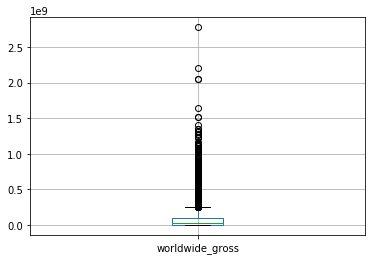

In [43]:
df_financials.boxplot(column=['worldwide_gross'])

In [ ]:
df_financials.boxplot(column=['ROI'])

In [44]:
# Number of movies in 75th, 90th, 99th percentiles - By worldwide gross revenue
print(f"Number of movies in 75th percentile: {len(df_financials[df_financials['worldwide_gross']>1.044737e+08])}")    
print(f"Number of movies in 90th percentile: {len(df_financials[df_financials['worldwide_gross']>2.596225e+08])}")
print(f"Number of movies in 95th percentile: {len(df_financials[df_financials['worldwide_gross']>4.102847e+08])}")
print(f"Number of movies in 99th percentile: {len(df_financials[df_financials['worldwide_gross']>8.938658e+08])}")

Number of movies in 75th percentile: 1354
Number of movies in 90th percentile: 542
Number of movies in 95th percentile: 271
Number of movies in 99th percentile: 55


In [45]:
# Q1: What movies are the top gross revenue generators? (including outliers)

# Create new df - movies with gross revenue above 90th percentile
df_grossrev_99p = df_financials[df_financials.worldwide_gross >= 8.938658e+08].sort_values('worldwide_gross', ascending = False)
display(df_grossrev_99p.shape)

# top 25
df_grossrev_top25 = df_financials.sort_values('worldwide_gross', ascending = False).head(25)
display(df_grossrev_top25.shape)

(55, 15)

(25, 15)

/Users/Magali/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:572: UserWarning: The handle <BarContainer object of 55 artists> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/Users/Magali/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Magali/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Magali/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/Magali/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/backends/bac

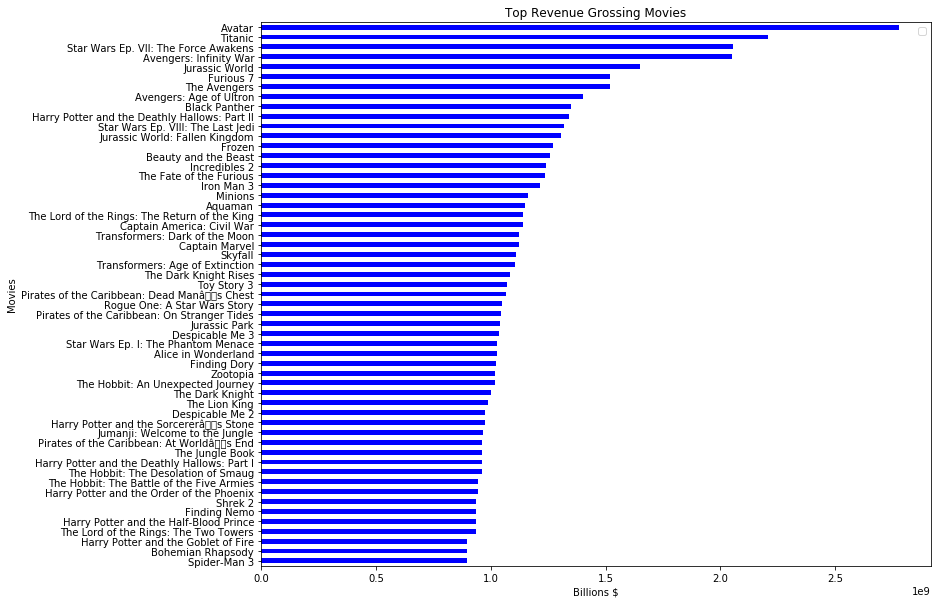

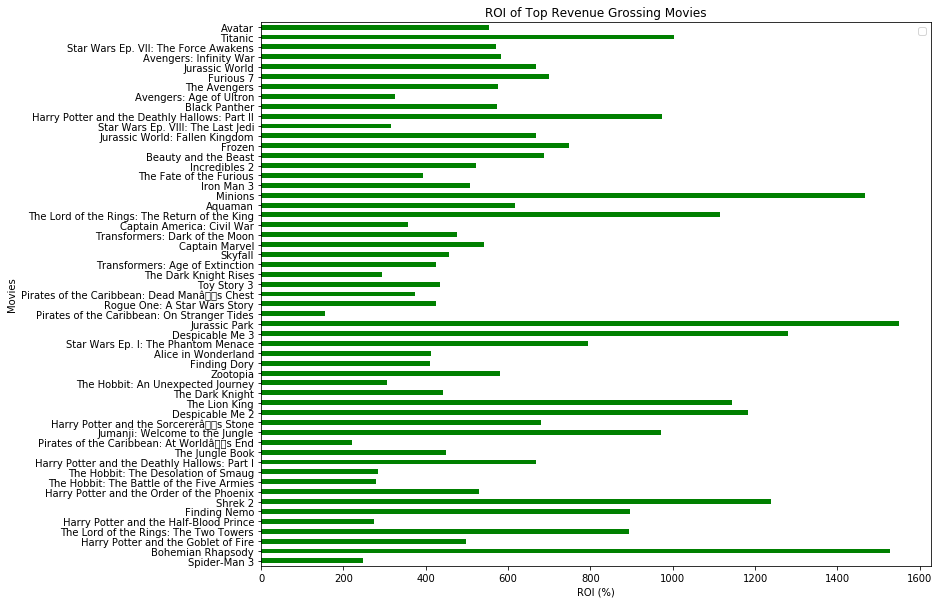

In [46]:
# Graph gross revenue movies

ax1 = df_grossrev_99p.plot.barh(x= 'title', 
                                y= 'worldwide_gross', 
                                color = 'blue', 
                                stacked=False, 
                                rot=0, 
                                figsize=(12,10), 
                                label = '_nolegend_')
ax1.set(
    title='Top Revenue Grossing Movies',
    xlabel='Billions $',
    ylabel='Movies')
ax1.invert_yaxis()

ax2 = df_grossrev_99p.plot.barh(x= 'title', 
                                y = 'ROIpct', 
                                color = 'green', 
                                stacked=False, 
                                rot=0, 
                                figsize=(12,10),
                                label = '_nolegend_')

ax2.set(
    title='ROI of Top Revenue Grossing Movies',
    xlabel='ROI (%)',
    ylabel='Movies')
ax2.invert_yaxis()

plt.style.use('ggplot')
plt.show()

In [47]:
# Q2: Is movie industry profitable? Analysis w/o outliers and from year 2000 - present

# Create ROI df, remove NaN
df_roi = df_financials[df_financials['ROI'].notnull()]
display(df_financials.describe())
df_roi.describe()

,id,production_budget,domestic_gross,worldwide_gross,year,foreign_gross,net_revenue,ROI,ROIpct,month_num
count,5780.000000,5.780000e+03,5.233000e+03,5.414000e+03,5780.000000,5.233000e+03,5.414000e+03,5414.000000,5414.000000,5780.000000
mean,50.369723,3.159652e+07,4.626630e+07,9.769777e+07,2003.965398,5.450590e+07,6.438370e+07,4.109852,410.989073,7.051384
std,28.825690,4.181652e+07,7.030032e+07,1.788742e+08,12.726243,1.177941e+08,1.498716e+08,30.468579,3046.861304,3.480491
min,1.000000,1.100000e+03,3.880000e+02,2.600000e+01,1915.000000,0.000000e+00,-2.002376e+08,-1.000000,-100.000000,1.000000
25%,25.000000,5.000000e+06,4.299773e+06,7.002417e+06,2000.000000,8.992000e+03,-1.863729e+06,-0.300000,-29.902500,4.000000
50%,50.000000,1.700000e+07,2.199526e+07,3.331993e+07,2007.000000,9.400000e+06,1.189567e+07,0.880000,88.480000,7.000000
75%,75.000000,4.000000e+07,5.759825e+07,1.044737e+08,2012.000000,5.330000e+07,6.739077e+07,2.967500,296.537500,10.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2020.000000,2.015838e+09,2.351345e+09,1799.000000,179900.000000,12.000000


,id,production_budget,domestic_gross,worldwide_gross,year,foreign_gross,net_revenue,ROI,ROIpct,month_num
count,5414.000000,5.414000e+03,5.233000e+03,5.414000e+03,5414.000000,5.233000e+03,5.414000e+03,5414.000000,5414.000000,5414.000000
mean,50.225896,3.331407e+07,4.626630e+07,9.769777e+07,2003.598448,5.450590e+07,6.438370e+07,4.109852,410.989073,6.978020
std,28.767517,4.248916e+07,7.030032e+07,1.788742e+08,12.547909,1.177941e+08,1.498716e+08,30.468579,3046.861304,3.444162
min,1.000000,1.100000e+03,3.880000e+02,2.600000e+01,1915.000000,0.000000e+00,-2.002376e+08,-1.000000,-100.000000,1.000000
25%,25.000000,6.000000e+06,4.299773e+06,7.002417e+06,1999.000000,8.992000e+03,-1.863729e+06,-0.300000,-29.902500,4.000000
50%,50.000000,1.900000e+07,2.199526e+07,3.331993e+07,2006.000000,9.400000e+06,1.189567e+07,0.880000,88.480000,7.000000
75%,75.000000,4.200000e+07,5.759825e+07,1.044737e+08,2012.000000,5.330000e+07,6.739077e+07,2.967500,296.537500,10.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2019.000000,2.015838e+09,2.351345e+09,1799.000000,179900.000000,12.000000


In [48]:
# Outlier detection
min_roi_threshold, max_roi_threshold = df_roi['ROI'].quantile([0.00, 0.90]).round(2)
min_roi_threshold, max_roi_threshold

(-1.0, 7.16)

In [50]:
df_roi[df_roi['ROI'] > max_roi_threshold]

,title,id,release_date,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross,net_revenue,ROI,ROIpct,title_yr,month,month_num
2,10 Cloverfield Lane,54,2016-03-11,5000000.0,72082999.0,108286422.0,2016,Par.,36203423.0,103286422.0,20.66,2065.73,10 Cloverfield Lane-2016,Mar,3
13,12 Years a Slave,18,2013-10-18,20000000.0,56671993.0,181025343.0,2013,FoxS,124353350.0,161025343.0,8.05,805.13,12 Years a Slave-2013,Oct,10
30,20 Dates,9,1999-02-26,66000.0,541636.0,602920.0,1999,NaN,61284.0,536920.0,8.14,813.52,20 Dates-1999,Feb,2
33,"20,000 Leagues Under the Sea",15,1916-12-24,200000.0,8000000.0,8000000.0,1916,NaN,0.0,7800000.0,39.00,3900.00,"20,000 Leagues Under the Sea-1916",Dec,12
37,2016: Obamaâs America,13,2012-07-13,2500000.0,33349941.0,33349941.0,2012,NaN,0.0,30849941.0,12.34,1234.00,2016: Obamaâs America-2012,Jul,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5739,You Only Live Twice,54,1967-06-13,9500000.0,43100000.0,111600000.0,1967,NaN,68500000.0,102100000.0,10.75,1074.74,You Only Live Twice-1967,Jun,6
5741,You're Next,17,2013-08-23,1000000.0,18494006.0,26887177.0,2013,LGF,8393171.0,25887177.0,25.89,2588.72,You're Next-2013,Aug,8
5745,Young Frankenstein,84,1974-12-15,2800000.0,86300000.0,86300000.0,1974,NaN,0.0,83500000.0,29.82,2982.14,Young Frankenstein-1974,Dec,12
5749,Your Sister's Sister,73,2012-06-15,120000.0,1597486.0,3090593.0,2012,IFC,1493107.0,2970593.0,24.75,2475.49,Your Sister's Sister-2012,Jun,6


In [51]:
# new DF without ROI outliers and with movies from year 2000 - present
df_roi = df_roi[(df_roi['ROI'] < max_roi_threshold) & 
                       (df_roi['ROI'] > min_roi_threshold) & 
                       (df_roi['year'] >= 2000)]
display(df_roi.sort_values('ROI', ascending = False).head(10))

,title,id,release_date,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross,net_revenue,ROI,ROIpct,title_yr,month,month_num
103,A Dogâs Purpose,86,2017-01-27,25000000.0,64321890.0,203671625.0,2017,NaN,139349735.0,178671625.0,7.15,714.69,A Dogâs Purpose-2017,Jan,1
4425,The Descent,1,2006-08-04,7000000.0,26024456.0,57051053.0,2006,NaN,31026597.0,50051053.0,7.15,715.02,The Descent-2006,Aug,8
4790,The Lord of the Rings: The Fellowship of the Ring,43,2001-12-19,109000000.0,315544750.0,887210985.0,2001,NaN,571666235.0,778210985.0,7.14,713.96,The Lord of the Rings: The Fellowship of the R...,Dec,12
4757,The Legend of God's Gun,37,2008-07-18,30000.0,243768.0,243768.0,2008,NaN,0.0,213768.0,7.13,712.56,The Legend of God's Gun-2008,Jul,7
5074,The Signal,19,2008-02-22,50000.0,251150.0,406299.0,2008,NaN,155149.0,356299.0,7.13,712.60,The Signal-2008,Feb,2
2055,Hotel Transylvania 3: Summer Vacation,77,2018-07-13,65000000.0,167500092.0,527079962.0,2018,Sony,359579870.0,462079962.0,7.11,710.89,Hotel Transylvania 3: Summer Vacation-2018,Jul,7
1800,"Good Night, and Good Luck",98,2005-10-07,7000000.0,31501218.0,56586901.0,2005,NaN,25085683.0,49586901.0,7.08,708.38,"Good Night, and Good Luck-2005",Oct,10
3992,Star Wars: The Clone Wars,32,2008-08-15,8500000.0,35161554.0,68695443.0,2008,NaN,33533889.0,60195443.0,7.08,708.18,Star Wars: The Clone Wars-2008,Aug,8
3067,Nochnoy dozor,70,2006-02-17,4200000.0,1502188.0,33913542.0,2006,NaN,32411354.0,29713542.0,7.07,707.47,Nochnoy dozor-2006,Feb,2
5673,Winter's Bone,8,2010-06-11,2000000.0,6531503.0,16131551.0,2010,RAtt.,9600048.0,14131551.0,7.07,706.58,Winter's Bone-2010,Jun,6


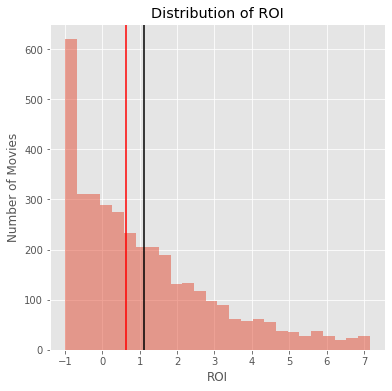

In [52]:
fig, ax = plt.subplots(figsize=(6,6))
ax.hist(df_roi['ROI'], bins='auto', alpha = 0.5)
ax.set_title('Distribution of ROI')
ax.set_xlabel('ROI')
ax.set_ylabel('Number of Movies')
ax.axvline(df_roi['ROI'].mean(), color = 'black')
ax.axvline(df_roi['ROI'].median(), color = 'red')

In [53]:
display(df_roi.ROI.apply(['mean', 'median', 'std']))

mean      1.115363
median    0.630000
std       1.873178
Name: ROI, dtype: float64

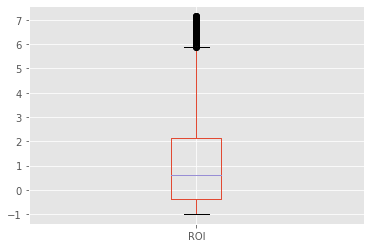

In [54]:
df_roi.boxplot(column=['ROI'])

In [55]:
#create new ROI buckets column 
def ROI_buckets(r):
    if r < 0: 
        return 'Not profitable'
    if r <= 1 : 
        return '0 - 100%'
    elif r <= 2: 
        return '100% - 200%'
    elif r <= 3: 
        return '200% - 300%'
    elif r <= 4: 
        return '300% - 400%'
    elif r <= 5: 
        return '400% - 500%'
    elif r <= 6: 
        return '500% - 600%'    
    elif r <= 7:
        return '600% - 700&'
    elif r <= 8:
        return '700% - 800%'
    else: 
        return 'Other'

df_roi['ROI_buckets'] = df_roi['ROI'].apply(ROI_buckets)
display(df_roi.head(10))
df_roi.info()

,title,id,release_date,production_budget,domestic_gross,worldwide_gross,year,studio,foreign_gross,net_revenue,ROI,ROIpct,title_yr,month,month_num,ROI_buckets
1,(500) Days of Summer,55,2009-07-17,7500000.0,32425665.0,34439060.0,2009,NaN,2013395.0,26939060.0,3.59,359.19,(500) Days of Summer-2009,Jul,7,300% - 400%
5,"10,000 B.C.",51,2008-03-07,105000000.0,94784201.0,269065678.0,2008,NaN,174281477.0,164065678.0,1.56,156.25,"10,000 B.C.-2008",Mar,3,100% - 200%
6,102 Dalmatians,6,2000-11-22,85000000.0,66941559.0,66941559.0,2000,NaN,0.0,-18058441.0,-0.21,-21.25,102 Dalmatians-2000,Nov,11,Not profitable
7,10th & Wolf,32,2006-08-18,8000000.0,54702.0,143782.0,2006,NaN,89080.0,-7856218.0,-0.98,-98.20,10th & Wolf-2006,Aug,8,Not profitable
11,12 Rounds,37,2009-03-27,20000000.0,12234694.0,17306648.0,2009,NaN,5071954.0,-2693352.0,-0.13,-13.47,12 Rounds-2009,Mar,3,Not profitable
12,12 Strong,64,2018-01-19,35000000.0,45819713.0,71118378.0,2018,WB,25298665.0,36118378.0,1.03,103.20,12 Strong-2018,Jan,1,100% - 200%
14,127 Hours,6,2010-11-05,18000000.0,18335230.0,60217171.0,2010,FoxS,41881941.0,42217171.0,2.35,234.54,127 Hours-2010,Nov,11,200% - 300%
15,13 Going On 30,96,2004-04-23,37000000.0,57139723.0,97658712.0,2004,NaN,40518989.0,60658712.0,1.64,163.94,13 Going On 30-2004,Apr,4,100% - 200%
16,13 Hours: The Secret Soldiers of Benghazi,30,2016-01-15,50000000.0,52853219.0,69411370.0,2016,Par.,16558151.0,19411370.0,0.39,38.82,13 Hours: The Secret Soldiers of Benghazi-2016,Jan,1,0 - 100%
17,13 Sins,51,2014-04-18,4000000.0,9134.0,47552.0,2014,RTWC,38418.0,-3952448.0,-0.99,-98.81,13 Sins-2014,Apr,4,Not profitable


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 1 to 5781
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              3677 non-null   object        
 1   id                 3677 non-null   int64         
 2   release_date       3677 non-null   datetime64[ns]
 3   production_budget  3677 non-null   float64       
 4   domestic_gross     3517 non-null   float64       
 5   worldwide_gross    3677 non-null   float64       
 6   year               3677 non-null   int64         
 7   studio             1106 non-null   object        
 8   foreign_gross      3517 non-null   float64       
 9   net_revenue        3677 non-null   float64       
 10  ROI                3677 non-null   float64       
 11  ROIpct             3677 non-null   float64       
 12  title_yr           3677 non-null   object        
 13  month              3677 non-null   object        
 14  month_nu

In [208]:
#Distribution of ROI by year
df_roi_yr = df_roi.groupby('year')['ROI_buckets'].value_counts(normalize = True)
df_roi_yr.tail(10)

year  ROI_buckets   
2018  400% - 500%       0.048780
      700% - 800%       0.008130
2019  Not profitable    0.340909
      0 - 100%          0.250000
      200% - 300%       0.159091
      100% - 200%       0.090909
      300% - 400%       0.068182
      500% - 600%       0.045455
      400% - 500%       0.022727
      600% - 700&       0.022727
Name: ROI_buckets, dtype: float64

In [93]:
# Analysis of ROI of movies in 90th percentile by ROI and after year 2000 (3,676 total movies)
df_roi_yr_median = df_roi.groupby(['year']).agg(['median'])
df_roi_yr_median

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,net_revenue,ROI,ROIpct,month_num
,median,median,median,median,median,median,median,median,median
year,,,,,,,,,
2000,51.0,23500000.0,20752058.5,32831338.0,7052479.5,3897150.5,0.430,42.905,7.0
2001,53.0,25000000.0,25288103.0,29406132.0,4910354.0,5858355.0,0.480,47.790,8.0
2002,49.5,21000000.0,19119407.0,28643729.5,4862618.0,6002986.5,0.375,37.625,7.0
2003,43.0,20000000.0,19480739.0,27676370.0,8784561.0,6797282.0,0.405,40.205,7.0
2004,50.5,26000000.0,21092751.0,34607966.0,10373171.5,3609476.5,0.390,38.800,7.0
2005,47.0,25000000.0,20370488.5,38273443.0,15122498.0,6977220.0,0.390,39.015,7.0
2006,47.5,17750000.0,16099104.5,27834762.5,9637502.5,8190612.5,0.465,46.690,7.0
2007,46.0,20000000.0,15036130.5,30261293.0,16713384.5,5238354.0,0.350,34.670,8.0


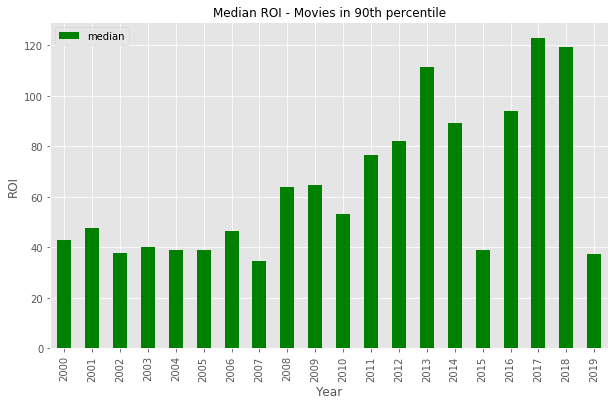

In [98]:
# Graph median and mean ROI 

df_roi_yr_median['ROIpct'].plot.bar(figsize=(10,6), color = 'green')
plt.title('Median ROI - Movies in 90th percentile', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('ROI', fontsize = 12)

plt.style.use('ggplot')

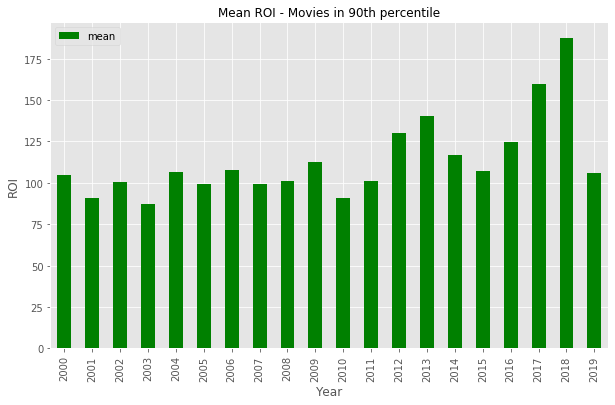

In [135]:
# Analysis of ROI of movies in 90th percentile by ROI and after year 2000 (3,676 total movies)
df_roi_yr_mean = df_roi.groupby(['year']).agg(['mean'])

df_roi_yr_mean['ROIpct'].plot.bar(figsize=(10,6), color = 'green')
plt.title('Mean ROI - Movies in 90th percentile', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('ROI', fontsize = 12)

plt.style.use('ggplot')

In [102]:
# Graph ROI of movies in 90th percentile by ROI and after year 2000 (3,676 total movies)

#df_roi['ROI_buckets'].value_counts(normalize = True).plot.bar(figsize=(10,6), color = 'green')
#plt.title('ROI - Movies in 90th percentile', fontsize = 12)
#plt.xlabel('Worldwide gross revenue / production budget', fontsize = 12)
#plt.ylabel('Share of movies', fontsize = 12)

#plt.style.use('ggplot')

In [132]:
df_roi_pct = ((df_roi.groupby(['year', 'ROI_buckets'])['ROI_buckets'].count()/df_roi.groupby(['year'])['ROI_buckets'].count()))*100
display(df_roi_pct.head(5))

year  ROI_buckets
2000  0 - 100%       25.568182
      100% - 200%    15.909091
      200% - 300%     6.250000
      300% - 400%     7.954545
      400% - 500%     5.113636
Name: ROI_buckets, dtype: float64

In [133]:
from matplotlib import cm
viridis = cm.get_cmap('viridis', 9)

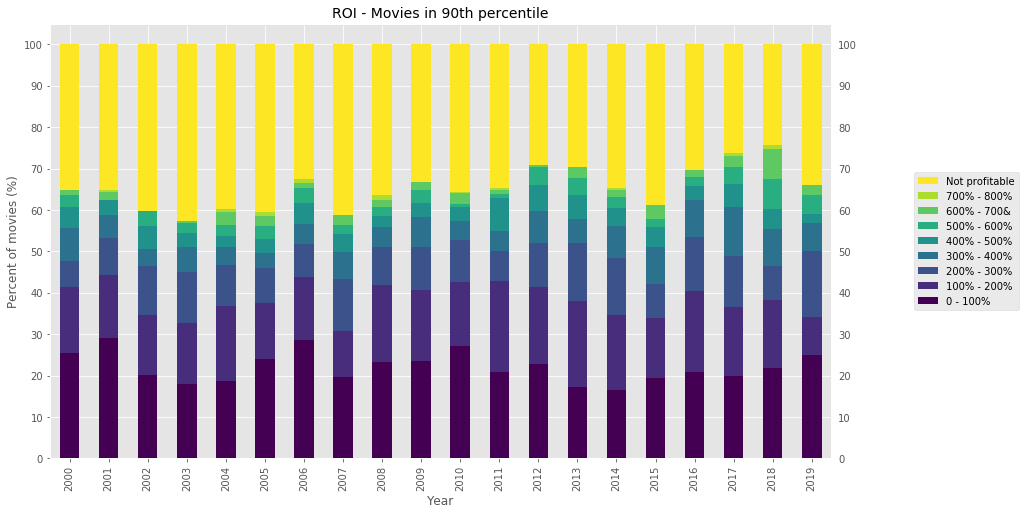

In [143]:
ax = df_roi_pct.unstack().plot.bar(stacked = True, figsize=(14,8), color=viridis.colors)

ax.set_title('ROI - Movies in 90th percentile', fontsize = 14)
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Percent of movies (%)', fontsize = 12)
ax.yaxis.set_ticks(np.arange(0, 110, 10))
ax.tick_params(labeltop=False, labelright=True)

# Reverse legend order
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.1,0.5))

plt.show()

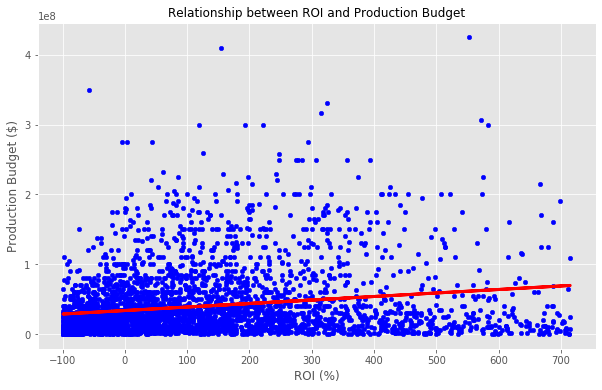

In [226]:
## Explore distributions and relationships
df_roi.plot.scatter(x = 'ROIpct',
                       y = 'production_budget', 
                       c = 'blue', 
                   figsize = (10,6))

from scipy.stats import linregress
x = df_roi.ROIpct
y = df_roi.production_budget
stats = linregress(x, y)

m = stats.slope
b = stats.intercept

# Set the linewidth on the regression line to 3px
plt.plot(x, m * x + b, color="red", linewidth=3)

plt.title('Relationship between ROI and Production Budget', fontsize = 12)
plt.xlabel('ROI (%)', fontsize = 12)
plt.ylabel('Production Budget ($)', fontsize = 12)

plt.show()

Text(0, 0.5, 'Production Budget ($)')

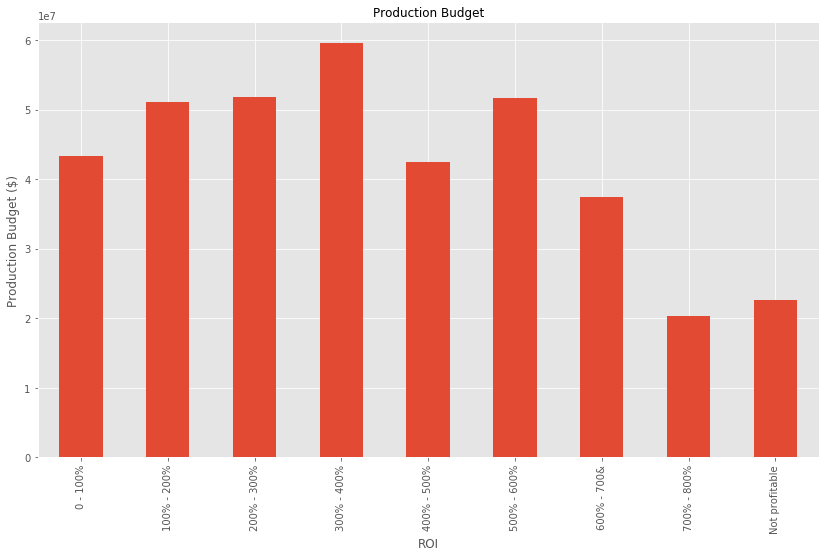

In [224]:
df_roi.groupby('ROI_buckets').production_budget.mean().plot.bar(figsize=(14,8))
plt.title('Production Budget', fontsize = 12)
plt.xlabel('ROI', fontsize = 12)
plt.ylabel('Production Budget ($)', fontsize = 12)

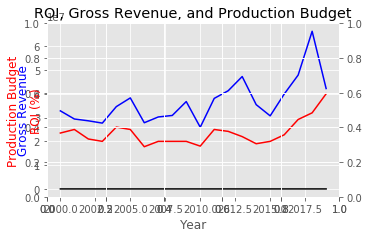

In [295]:
fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax3=fig.add_subplot(111, label="3", frame_on=False)

ax.plot(df_roi_yr_median['worldwide_gross'], color='blue')
ax.set_title('ROI, Gross Revenue, and Production Budget')
ax.set_xlabel('Year')
ax.set_ylabel("Gross Revenue", color="blue")
#ax.tick_params(axis='x', colors="C0")
#ax.tick_params(axis='y', colors="C0")

ax.plot(df_roi_yr_median['production_budget'], color='red')
ax2.yaxis.tick_left() 
ax2.set_ylabel('Production Budget', color="red")       

ax.plot(df_roi_yr_median['ROIpct'], color='black')
ax3.set_ylabel('ROI (%)', color="red") 
ax3.yaxis.tick_right()


fig.tight_layout()
plt.show()


Text(0.5, 1.0, 'Production Budget')

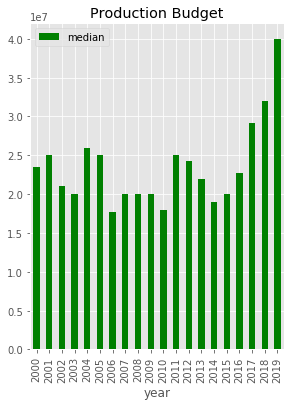

In [288]:
ax1 = plt.subplot(1,1,1)
df_roi_yr_median['ROIpct'].plot.bar(figsize=(10,6), color = 'green', ax=ax1)
ax1.set_title('ROI')

ax2 = plt.subplot(1,1,1)
df_roi_yr_median['production_budget'].plot.line(figsize=(10,6), color = 'green', ax=ax1)
#ax2.set_title('Production Budget')



#df_roi_yr_median['production_budget'].plot.bar(figsize=(10,6), color = 'green')
#plt.title('Median Production Budget', fontsize = 12)
#plt.xlabel('Year', fontsize = 12)
#plt.ylabel('Production Budget ($)', fontsize = 12)

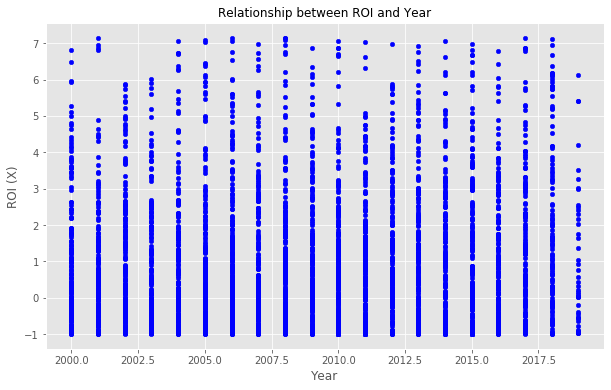

In [209]:
## ROI and year movie released
df_roi.plot.scatter(x = 'year',
                       y = 'ROI', 
                       c = 'blue', 
                   figsize = (10,6))

plt.title('Relationship between ROI and Year', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('ROI (X)', fontsize = 12)

plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

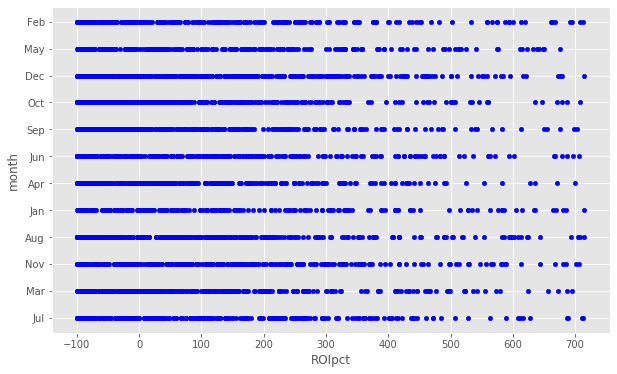

In [212]:
# ROI and month movie released
df_roi.plot.scatter(x = 'ROIpct',
                       y = 'month', 
                       c = 'blue', 
                   figsize = (10,6))

x = df_roi.ROIpct
y = df_roi.month
stats = linregress(x, y)

m = stats.slope
b = stats.intercept

# Set the linewidth on the regression line to 3px
plt.plot(x, m * x + b, color="red", linewidth=3)

plt.title('Relationship between ROI and Release Month', fontsize = 12)
plt.xlabel('ROI (%)', fontsize = 12)
plt.ylabel('Month', fontsize = 12)

plt.show()

In [ ]:
df_roi.head()

In [ ]:
# NET REVENUE

In [ ]:
# Number of movies in 75th, 99th percentiles - By worldwide net revenue
print(f"Number of movies in 75th percentile: {len(df_revenue[df_revenue['net_revenue']>6.735617e+07])}")    
print(f"Number of movies in 99.5 percentile: {len(df_revenue[df_revenue['net_revenue']>3.187214e+08])}")
print(f"Number of movies in 99.9 percentile: {len(df_revenue[df_revenue['net_revenue']>7.646151e+08])}")

In [ ]:
# Identify top movies by worldwide net revenue
df_revenue.sort_values(by = ['net_revenue'], axis=0, ascending=[False], inplace=False,
               na_position='last', ignore_index=True)[['title', 'net_revenue', 'ROI', 'production_budget']].head()

In [ ]:
# Identify movies with worldwide net revenue in 99.9 percentile

# Create new df
df_nr_999p = df_revenue[df_revenue.net_revenue >= 7.646151e+08].sort_values('net_revenue', ascending = False)
df_nr_999p.head()

# how to use .loc?
#nr_99_3p = df_revenue['net_revenue'].loc[lambda x: x>8.407595e+08].sort_values(ascending = False, ignore_index = True)
#nr_99_3p = df_revenue[['title','net_revenue']]['net_revenue'].loc[lambda x: x>8.407595e+08].sort_values(ascending = False, ignore_index = True)

In [ ]:
# Graph net revenue and ROI of movies in 99.9 percentile by net revenue

ax1 = df_nr_999p.plot.barh(x= 'title', y= 'net_revenue', color = 'blue', stacked=False, rot=0, figsize=(12,10))
ax1.set(
    title='Net Revenue - Movies in 99th Percentile',
    xlabel='Billions $',
    ylabel='Movies')
ax1.invert_yaxis()

ax2 = df_nr_999p.plot.barh(x= 'title', y = 'ROI', color = 'green', stacked=False, rot=0, figsize=(12,10))
ax2.set(
    title='ROI - Movies in 99th Percentile by Net Revenue',
    xlabel='ROI (x)',
    ylabel='Movies')
ax2.invert_yaxis()

plt.style.use('ggplot')
plt.show()

In [ ]:
# merge df_ROI_v2 with df4 (has info on genres, run time)

In [ ]:
## Explore distributions and relationships
pd.plotting.scatter_matrix(df_revenue[['production_budget', 'domestic_gross', 'foreign_gross', 'worldwide_net_revenue']], figsize=(6,6));
plt.show()

In [ ]:
# Join with df4, which has info on genres, runtime, etc.
df4.head()

In [ ]:
df4 = df4.rename(columns={"primary_title": "title"})
df4.head()

In [ ]:
df4['title_yr'] = df4['title'].str.cat(df4.start_year.astype(str), sep = '-')
df4.head()

In [ ]:
df4.title.value_counts()

In [ ]:
df4.title_yr.value_counts()

In [ ]:
df_main = df_revenue.join(df4, how='left', rsuffix='_right')

In [ ]:
# QUESTIONS

In [ ]:
# glyphs

In [ ]:
## Clean up: Rename columns, convert dtypes to prepare dfs for joins and analysis

In [ ]:
df2 = df2.rename(columns={"nconst": "name_id"})
df2.head()

In [ ]:
df4 = df4.rename(columns={"tconst": "title_id"})
df4.head()

In [ ]:
df5 = df5.rename(columns={"tconst": "title_id"})
df5.head()

In [ ]:
df6 = df6.rename(columns={"tconst": "title_id", "nconst": "name_id"})
df6.head()

In [ ]:
df7 = df7.rename(columns={"tconst": "title_id"})
df7.head()

In [ ]:
df8['theater_date'] = pd.to_datetime(df8['theater_date'])
df8['dvd_date'] = pd.to_datetime(df8['dvd_date'])
df8.info()

In [ ]:
df8 = df8.rename(columns={"runtime": "runtime_mins"})
df8['runtime_mins'] = df8['runtime_mins'].str.rstrip('minutes')
df8.head()

In [ ]:
df10['release_date'] = pd.to_datetime(df10['release_date'])
df10.info()

In [ ]:
## Calculate worldwide_net_revenue and foreign_gross (revenue generated outside of US)
df11['worldwide_net_revenue'] = df11.worldwide_gross - df11.production_budget
df11['foreign_gross'] = df11.worldwide_gross - df11.domestic_gross

In [ ]:
## Explore distributions and relationships
pd.plotting.scatter_matrix(df11[['production_budget', 'domestic_gross', 'foreign_gross','worldwide_gross', 'worldwide_net_revenue']], figsize=(6,6));
plt.show()

In [ ]:
df11.apply(['mean', 'median', 'std'])

In [ ]:
# Explore distribution of worldwide_net_revenue
fig, ax = plt.subplots(figsize=(6,6))
ax.hist(df11['worldwide_net_revenue'], bins='auto', alpha = 0.5)
ax.set_title('Distribution of Worldwide Net Revenue')
ax.set_xlabel('Net Revenue ($ Billions)')
ax.set_ylabel('Number of Movies')
ax.axvline(df11['worldwide_net_revenue'].mean(), color = 'black')
ax.axvline(df11['worldwide_net_revenue'].median(), color = 'red')

In [ ]:
df11['worldwide_net_revenue'].describe()

In [ ]:
# Worldwide net revenue is positively skewed--mean is larger than median, with large outliers distorting the mean.
# Identify movies with above-median worldwide net revenue
above_median_worldwide_net_revenue = []

#df11.query('worldwide_net_revenue'>=8.550286e+06)

movies = df11.movie.values
#ww_net_rev = df11.worldwide_net_revenue.values

if df11['worldwide_net_revenue'] >= 8.550286e+06:
    above_median_worldwide_net_revenue.append()

above_median_worldwide_net_revenue

In [ ]:
# Explore distribution of worldwide_net_revenue

fig, ax = plt.subplots(4, figsize=(10,8))
ax1 = plt.subplot(1,4,1)
ax1.hist(df_revenue['net_revenue'], bins='auto', color = 'green', alpha = 0.5)
ax1.set_title('Net Revenue', fontsize = 10)
ax1.set_xlabel('Dollars $', fontsize = 10)
ax1.set_ylabel('Number of Movies', fontsize = 10)
ax1.axvline(df_revenue['net_revenue'].mean(), color = 'black')

ax2 = plt.subplot(1,4,2)
ax2.hist(df_revenue['domestic_gross'], bins='auto', color = 'green', alpha = 0.5)
ax2.set_title('Domestic Gross Revenue' , fontsize = 10)
ax2.set_xlabel('Dollars $', fontsize = 10)
ax2.axvline(df_revenue['domestic_gross'].mean(), color = 'black')

ax3 = plt.subplot(1,4,3)
ax3.hist(df_revenue['foreign_gross'], bins='auto', color = 'green', alpha = 0.5)
ax3.set_title('Foreign Gross Revenue', fontsize = 10)
ax3.set_xlabel('Dollars $', fontsize = 10)
ax3.axvline(df_revenue['foreign_gross'].mean(), color = 'black')

ax4 = plt.subplot(1,4,4)
ax4.hist(df_revenue['production_budget'], bins='auto', color = 'green', alpha = 0.5)
ax4.set_title('Production Budget', fontsize = 10)
ax4.set_xlabel('Dollars $', fontsize = 10)
ax4.axvline(df_revenue['production_budget'].mean(), color = 'black')

#plt.style.use('ggplot')
plt.show()